In [82]:
# This program uses neural network called Long Short Term Memory (LSTM)
# Import libraries
import math 
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [83]:
# # Get stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2022-7-11')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557467
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624947
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765111
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898558
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2022-07-05,141.610001,136.929993,137.770004,141.559998,73353800.0,141.559998
2022-07-06,144.119995,141.080002,141.350006,142.919998,74064300.0,142.919998
2022-07-07,146.550003,143.279999,143.289993,146.350006,66253700.0,146.350006


In [84]:
# Get the number of rows and columns in the data set
df.shape

(2647, 6)

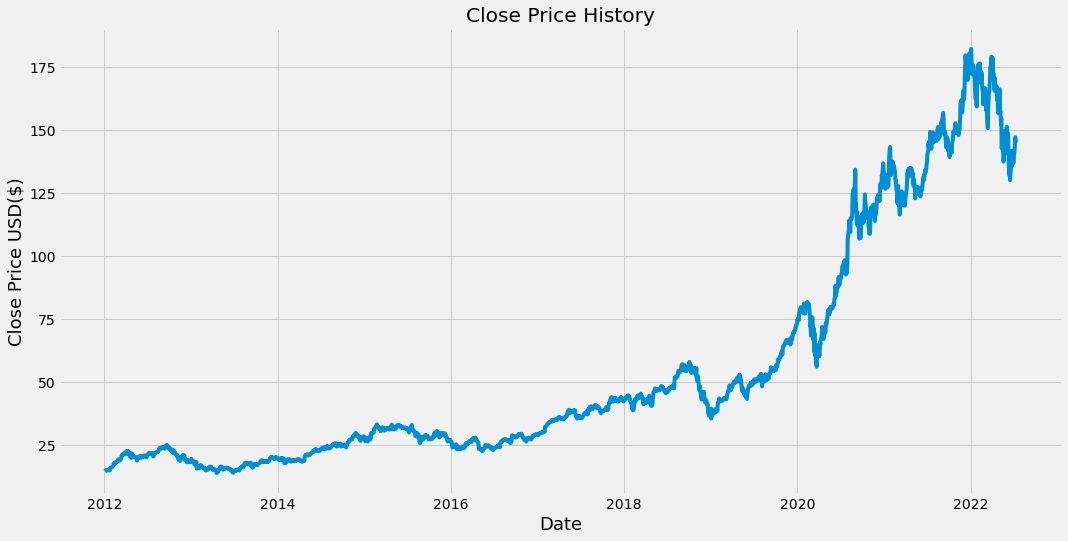

In [85]:
# Visualise the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.show()

In [86]:
# Create new dataframe with only the 'Close Column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on 
train_data_len = math.ceil(len(dataset)*.8)
train_data_len

2118

In [87]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.78781709],
       [0.79192263],
       [0.77901078]])

In [88]:
# Create the training data set
train_data = scaled_data[0:train_data_len,:]
# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [89]:
# Convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [90]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2058, 60, 1)

In [91]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [92]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [93]:
# Train the model
model.fit(x_train,y_train,batch_size = 1, epochs = 1)

2058/2058 [==============================] - 31s 14ms/step - loss: 2.5370e-04


In [94]:
# Create the testing data set
test_data = scaled_data[train_data_len - 60:,:]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [95]:
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [96]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 8ms/step


In [97]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5039114997157077

/var/folders/72/vd0_p99d32dc_p7__s8bghfr0000gn/T/ipykernel_88884/3058461796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


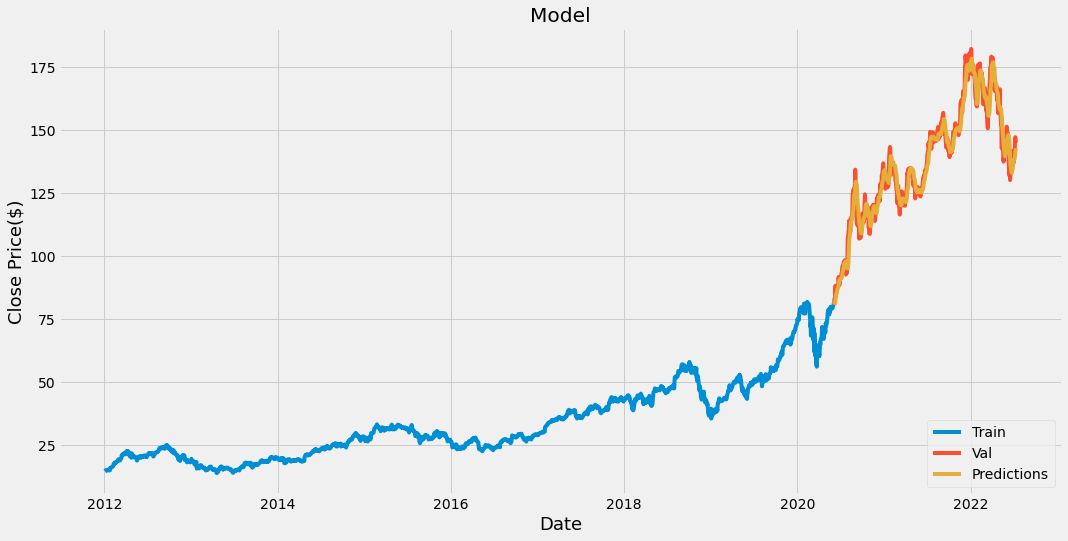

In [98]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
# Visualise the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc  = 'lower right')
plt.show()

In [99]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-06-04,80.580002,80.681152
2020-06-05,82.875000,80.881699
2020-06-08,83.364998,81.291641
2020-06-09,85.997498,81.820244
2020-06-10,88.209999,82.670898
...,...,...
2022-07-05,141.559998,138.301620
2022-07-06,142.919998,138.929520
2022-07-07,146.350006,139.793106


In [115]:
# Predict closing price 1 day in future
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2022-7-11')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get last 60 days closing prices and convert dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be vlaues between 0 and 1
last_60_days_scale = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scale)
X_test = np.array(last_60_days_scale)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
#pred_price = scaler.inverse_transform(pred_price)
pred_price

2/2 [==============================] - 0s 3ms/step


array([[0.17148735],
       [0.16791968],
       [0.16776621],
       [0.16939199],
       [0.16927333],
       [0.16870803],
       [0.16548002],
       [0.16623946],
       [0.16200753],
       [0.16184764],
       [0.16676915],
       [0.16259855],
       [0.16281417],
       [0.16387166],
       [0.16842891],
       [0.16198668],
       [0.16234128],
       [0.15871541],
       [0.16041625],
       [0.15486193],
       [0.15213668],
       [0.15528427],
       [0.15419748],
       [0.15675984],
       [0.15093464],
       [0.14854012],
       [0.14870562],
       [0.15251684],
       [0.15061699],
       [0.15072747],
       [0.15298006],
       [0.1570371 ],
       [0.15648264],
       [0.15639256],
       [0.15812573],
       [0.15408678],
       [0.15461273],
       [0.15639256],
       [0.15587296],
       [0.15219198],
       [0.14838843],
       [0.144773  ],
       [0.14537841],
       [0.14721678],
       [0.14352165],
       [0.14455289],
       [0.14751995],
       [0.147